In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform

import tensorflow as tf
from tensorflow.keras import layers,Regularizer

In [173]:
import warnings
warnings.filterwarnings("ignore")

In [174]:
dataset = pd.read_csv(r"./house-prices-advanced-regression-techniques/train.csv")
dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [175]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [176]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [177]:
print(dataset.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Cleaning and Data Preparation

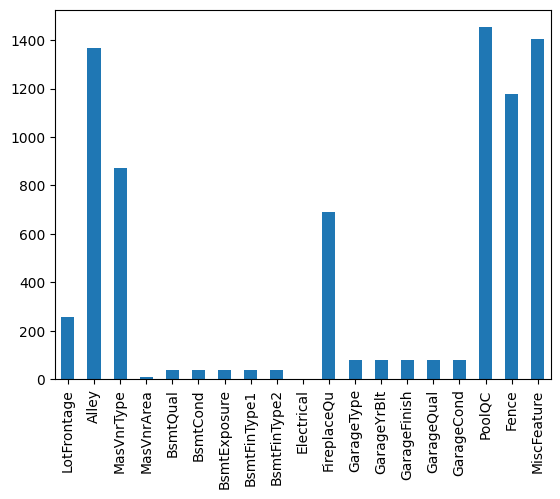

In [178]:
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.plot.bar()
plt.show()


Drop colume with more than 50% missing value or not usefull columes

In [179]:
dataset = dataset.drop(columns="Id")

In [180]:
initial_columns = set(dataset.columns)
dataset = dataset.dropna(axis=1,thresh=0.5*len(dataset))
remaining_columns = set(dataset.columns)
# drop columns
initial_columns - remaining_columns

{'Alley', 'Fence', 'MasVnrType', 'MiscFeature', 'PoolQC'}

In [181]:
dataset.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

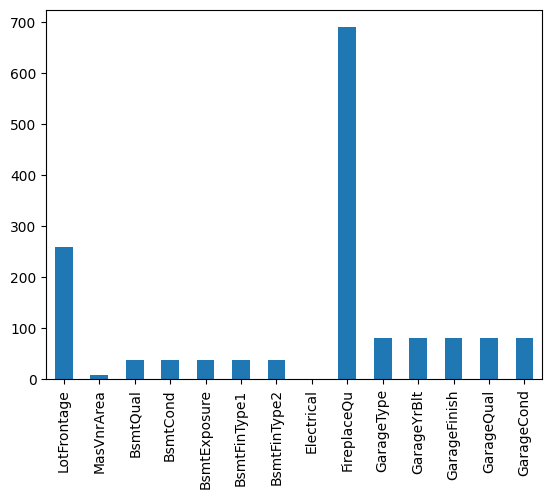

In [182]:
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.plot.bar()
plt.show()

In [183]:
categorical_df = dataset.select_dtypes(include=['object']).columns
numerical_df = dataset.select_dtypes(exclude=['object']).columns

print("Categorical columns:\n", categorical_df)
print("Numerical columns:\n", numerical_df)

Categorical columns:
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical columns:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGr

In [184]:
for i in numerical_df:
    if dataset[i].isnull().sum() > 0:
        dataset[i] = dataset[i].fillna(dataset[i].mode()[0])

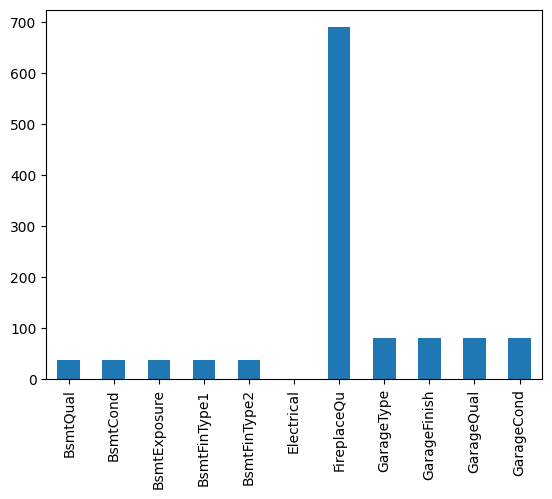

In [185]:
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.plot.bar()
plt.show()

In [186]:
for i in categorical_df:
    if dataset[i].isnull().sum()>0:
        dataset[i] = dataset[i].fillna(dataset[i].mode()[0])

In [187]:
print("Total NaN value: ",dataset.isnull().sum().sum())
dataset[numerical_df].corr()["SalePrice"].sort_values(ascending=False)

Total NaN value:  0


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.397778
BsmtFinSF1       0.386420
LotFrontage      0.329220
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

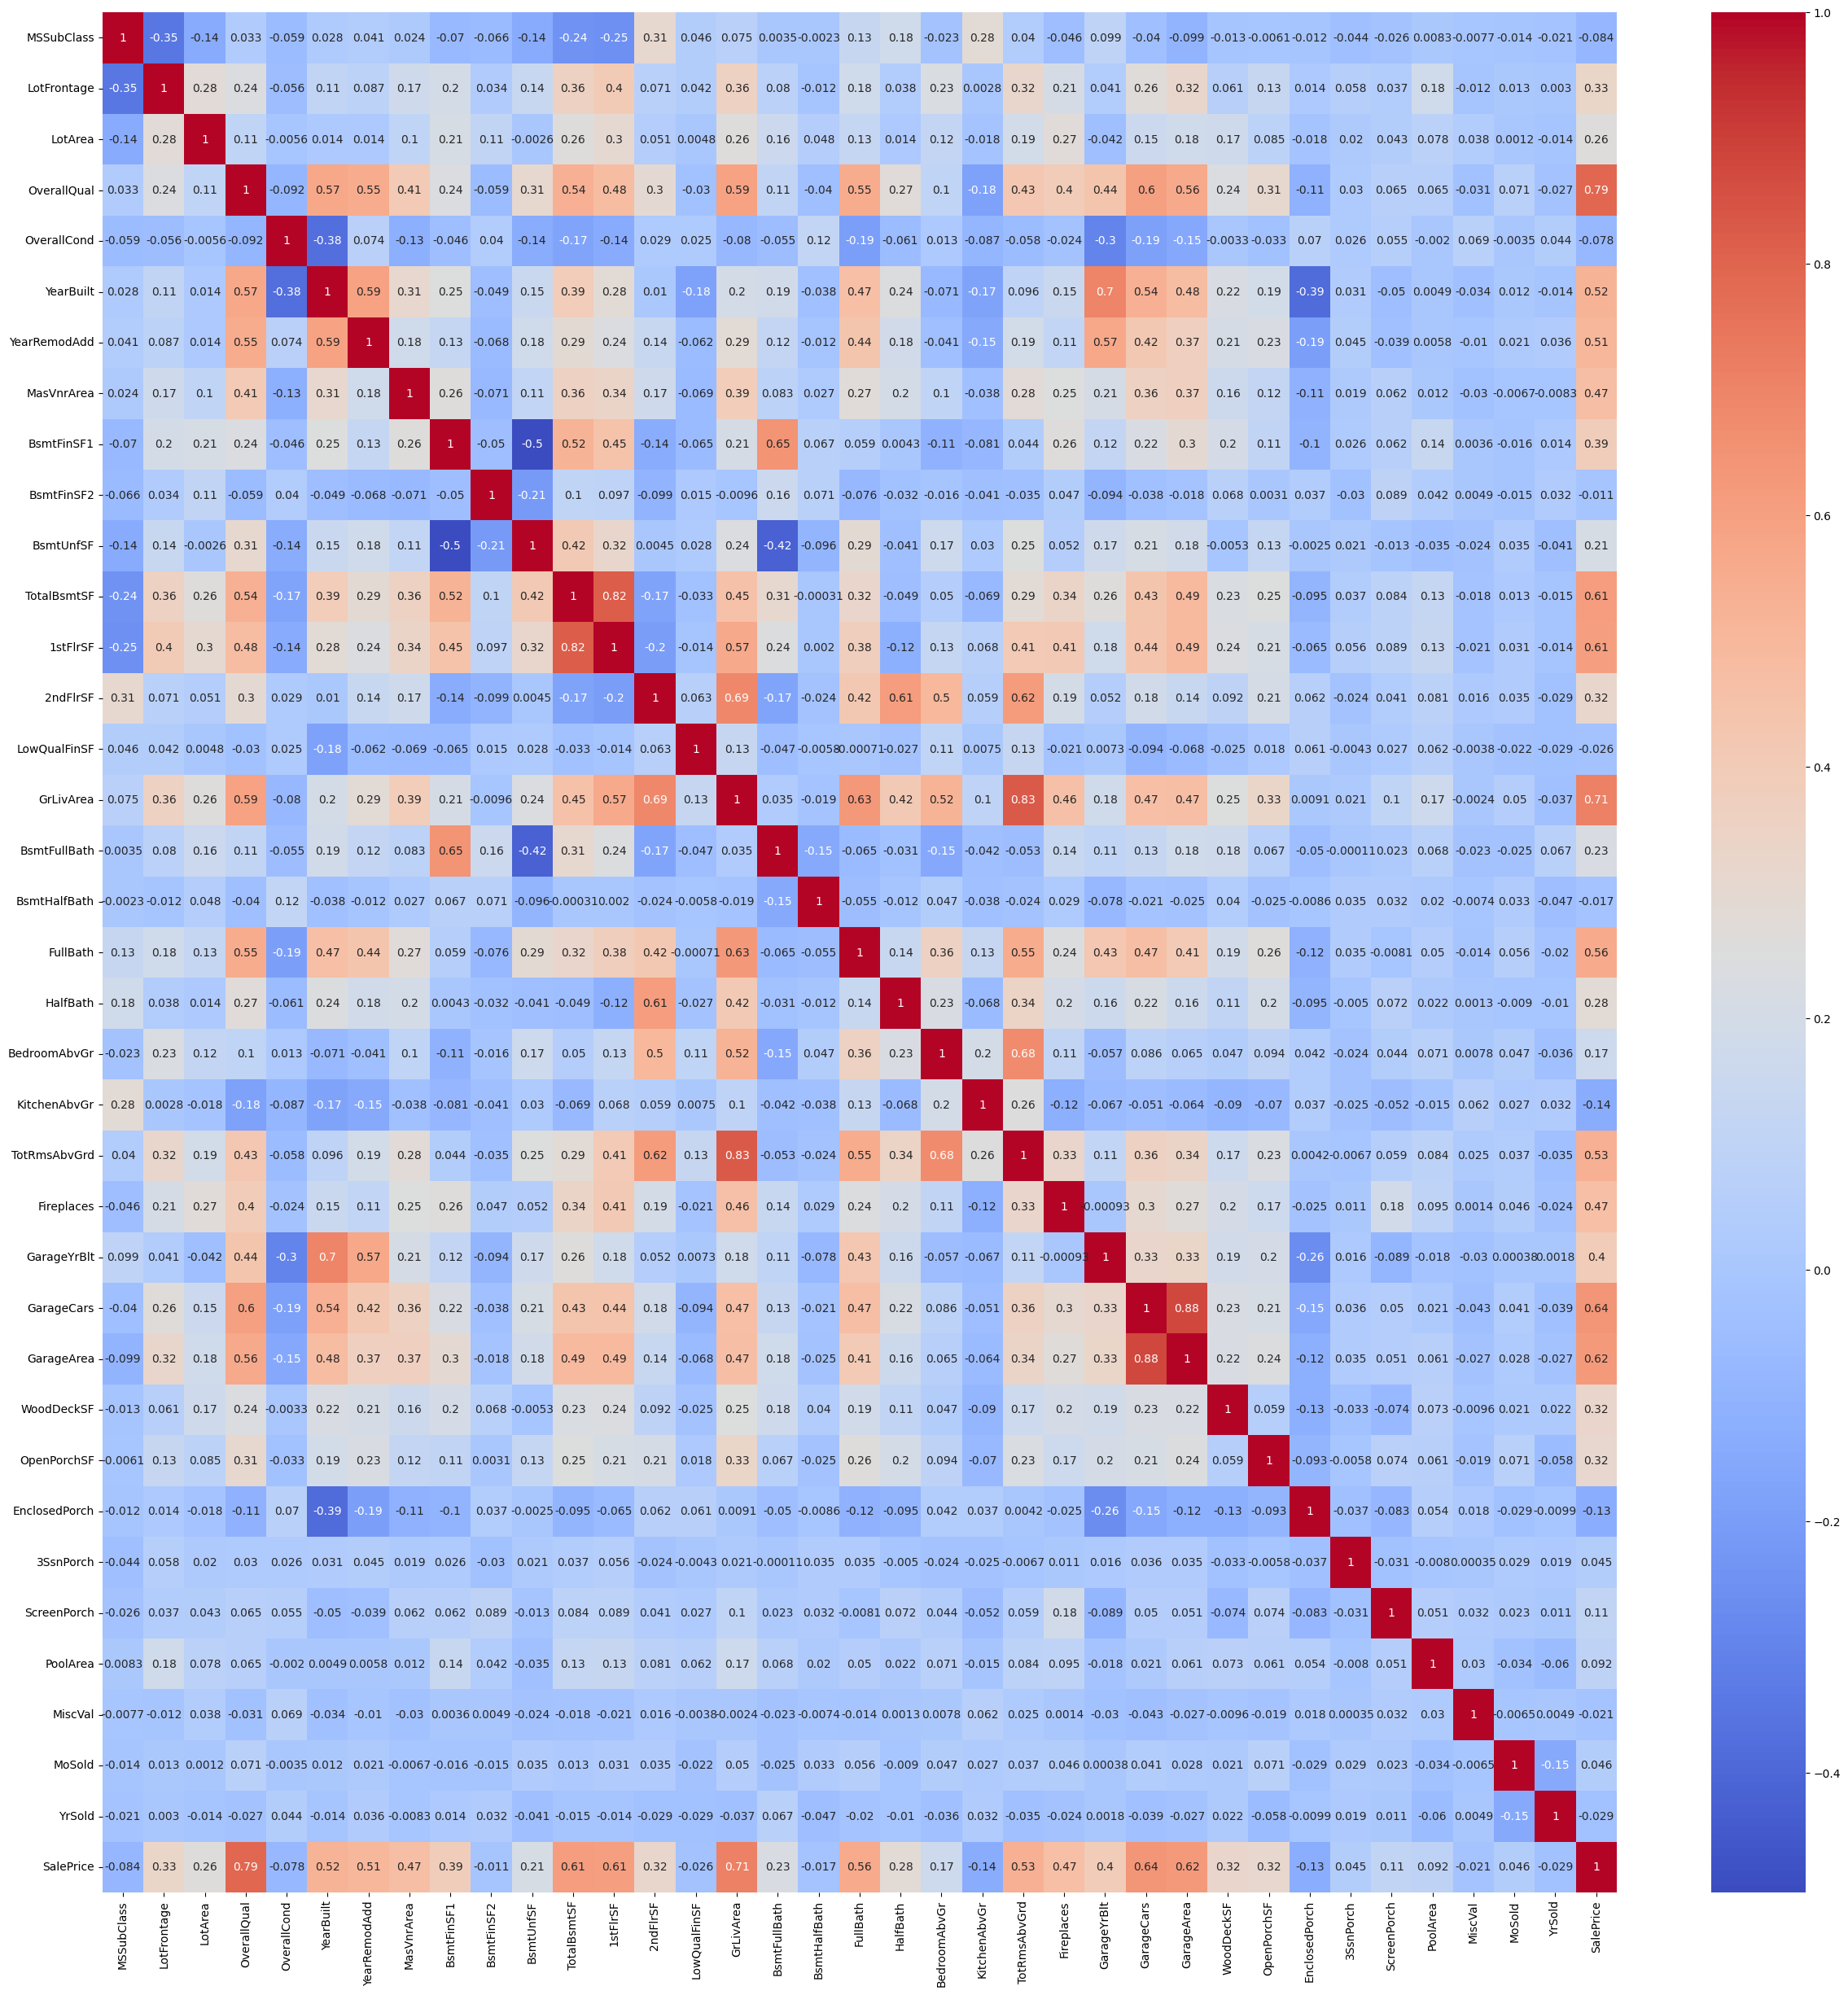

In [188]:
plt.figure(figsize=(30,30))
sns.heatmap(data=dataset[numerical_df].corr(),annot=True,cmap="coolwarm")
plt.show()

In [189]:
dataset["SalePrice"].skew(), dataset["SalePrice"].kurt()

(np.float64(1.8828757597682129), np.float64(6.536281860064529))

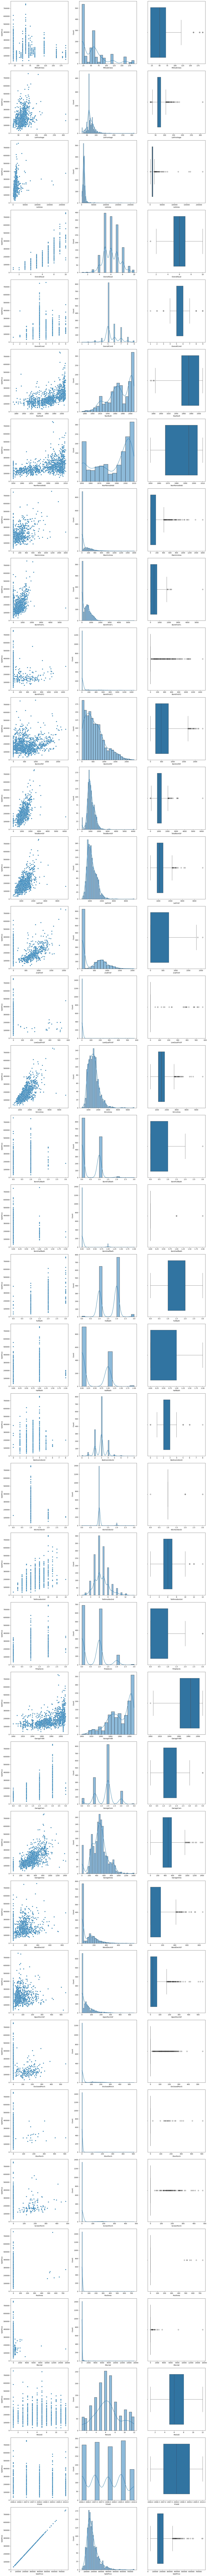

In [190]:
n = len(numerical_df)
plt.figure(figsize=(18,6*n))
for i,col in enumerate(numerical_df):
    plt.subplot(n,3,3*i+1)
    sns.scatterplot(x=col,y="SalePrice",data=dataset)
    plt.subplot(n,3,3*i+2)
    sns.histplot(data=dataset[col],kde=True)
    plt.subplot(n,3,3*i+3)
    sns.boxplot(x=dataset[col])
plt.tight_layout()
plt.show()

In [191]:
q1 = dataset["SalePrice"].quantile(0.25)
q3 = dataset["SalePrice"].quantile(0.75)
IQR = q3-q1
dataset = dataset[(dataset["SalePrice"]>=(q1-1.5*IQR)) & (dataset["SalePrice"]<=(q3+1.5*IQR))]

In [192]:
top_5_corr = dataset[numerical_df].corr()["SalePrice"].sort_values(ascending=False)[1:6]
top_5_corr

OverallQual    0.784294
GrLivArea      0.661325
GarageCars     0.628013
GarageArea     0.607230
FullBath       0.577369
Name: SalePrice, dtype: float64

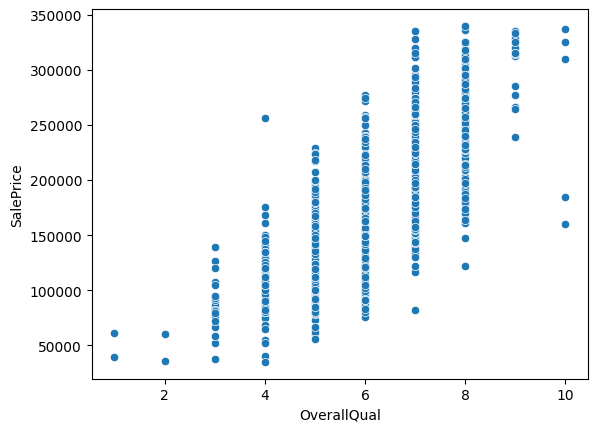

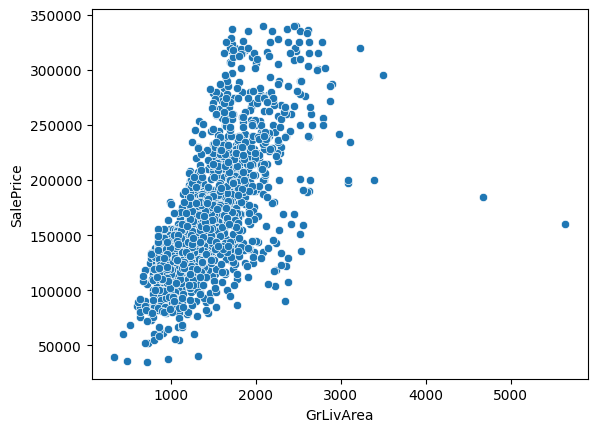

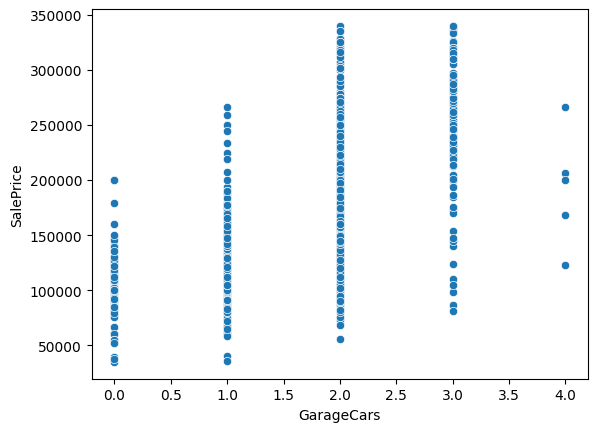

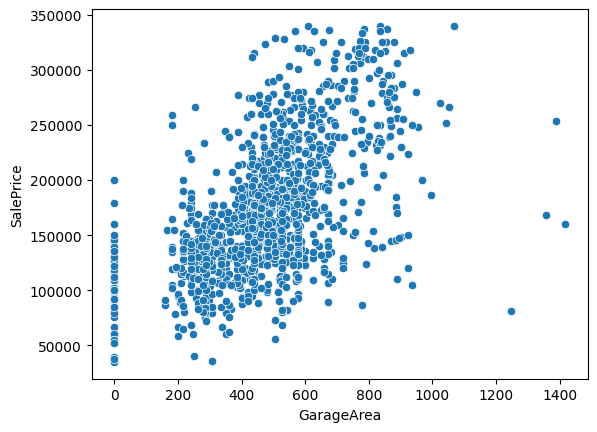

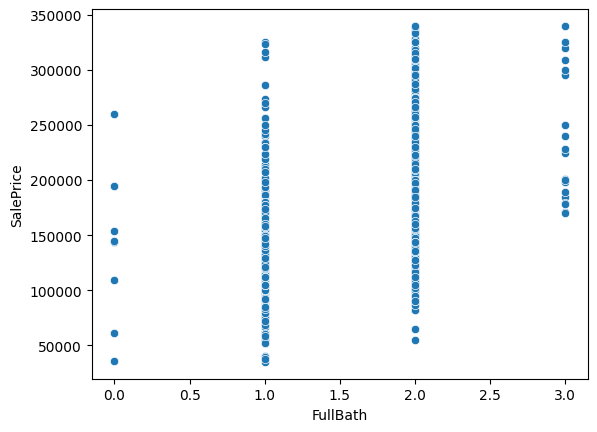

In [193]:
for col in top_5_corr.index:
    sns.scatterplot(x=col,y="SalePrice",data=dataset)
    plt.show()

In [194]:
dataset = dataset[dataset["GrLivArea"]<3500]
dataset = dataset[dataset["GarageArea"]<1300]
dataset.shape

(1395, 75)

In [195]:
# dataset["MSSubClass"] = dataset["MSSubClass"].astype(str)

### Features Engineering

In [196]:
dataset["TotalSF"] = dataset["TotalBsmtSF"]+dataset["1stFlrSF"]+dataset["2ndFlrSF"]
dataset = dataset.drop(columns=["TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1)

In [197]:
dataset["TotalBath"] = dataset["BsmtFullBath"]+0.5*dataset["BsmtHalfBath"]+dataset["FullBath"]+0.5*dataset["HalfBath"]
dataset = dataset.drop(columns=["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1)

In [198]:
# dataset["Condition"] = dataset["Condition1"]+"_"+dataset["Condition2"]
# dataset = dataset.drop(columns=["Condition1","Condition2"],axis=1)

In [199]:
# dataset["Exterior"] = dataset["Exterior1st"]+"_"+dataset["Exterior2nd"]
# dataset = dataset.drop(columns=["Exterior1st","Exterior2nd"],axis=1)

In [200]:
dataset["TotalBsmtFinSF"] = dataset["BsmtFinSF1"]+dataset["BsmtFinSF2"]
dataset = dataset.drop(columns=["BsmtFinSF1","BsmtFinSF2"],axis=1)

In [201]:
dataset.select_dtypes(["object"]).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [202]:
numerical_df = dataset.select_dtypes(exclude=["object"]).columns
numerical_df

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalSF', 'TotalBath',
       'TotalBsmtFinSF'],
      dtype='object')

In [203]:
onehot_col = ["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","Foundation","Heating","CentralAir","Electrical","Functional","GarageType","PavedDrive","SaleType","SaleCondition"]
ordinal_col = ["ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond"]

In [204]:
oe = OrdinalEncoder(categories=[["Ex","Gd","TA","Fa","Po","NA"]])
for i in ordinal_col:
    col = i+"_encoded"
    # print(col)
    dataset[col] = oe.fit_transform(dataset[[i]])

oe2 = OrdinalEncoder(categories=[["Gd","Av","Mn","No","NA"]])
dataset["BsmtExposure_encoded"] = oe2.fit_transform(dataset[["BsmtExposure"]])
oe3 = OrdinalEncoder(categories=[["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"]])
dataset["BsmtFinType1_encoded"]=oe3.fit_transform(dataset[["BsmtFinType1"]])
dataset["BsmtFinType2_encoded"]=oe3.fit_transform(dataset[["BsmtFinType2"]])
oe4 = OrdinalEncoder(categories=[["Fin","RFn","Unf","NA"]])
dataset["GarageFinish_encoded"]=oe4.fit_transform(dataset[["GarageFinish"]])

ordinal_col+=["BsmtFinType1","BsmtFinType2","GarageFinish","BsmtExposure"]

In [205]:
dataset = dataset.drop(columns=ordinal_col,axis=1)

In [206]:
dataset.isnull().sum().sum()

np.int64(0)

In [207]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(dataset[onehot_col])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(onehot_col), index=dataset.index)
dataset = pd.concat([dataset.drop(onehot_col, axis=1), encoded_df], axis=1)


In [208]:
dataset.shape

(1395, 217)

In [209]:
dataset.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtUnfSF  LowQualFinSF  ...  SaleType_ConLw  \
0          2003       196.0        150             0  ...             0.0   
1          1976         0.0        284             0  ...             0.0   
2          2002       162.0        434             0  ...             0.0   
3          1970         0.0        540             0  ...             0.0   
4          2000       350.0        490             0  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0           0.0          1.0                    0.0   
1           0.0           0.0          1.0                    0.0   
2           0.0           0.0          1.0                    0.0   
3           0.0           0.0          1.0                    1.0   
4           0.0           0.0          1.0                    0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 217 columns]

In [210]:
dataset.duplicated().sum()

np.int64(0)

In [211]:
dataset.drop_duplicates()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtUnfSF  LowQualFinSF  ...  SaleType_ConLw  \
0             2003       196.0        150             0  ...             0.0   
1             1976         0.0        284             0  ...             0.0   
2             2002       162.0        434             0  ...             0.0   
3             1970         0.0        540             0  ...             0.0   
4             2000       350.0        490             0  ...             0.0   
...            ...         ...        ...           ...  ...             ...   
1455          2000         0.0        953             0  ...             0.0   
1456          1988       119.0        589             0  ...             0.0   
1457          2006         0.0        877             0  ...             0.0   
1458          1996         0.0          0             0  ...             0.0   
1459          1965         0.0        136             0  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0              0.0           0.0          1.0                    0.0   
1              0.0           0.0          1.0                    0.0   
2              0.0           0.0          1.0                    0.0   
3              0.0           0.0          1.0                    1.0   
4              0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1455           0.0           0.0          1.0                    0.0   
1456           0.0           0.0          1.0                    0.0   
1457           0.0           0.0          1.0                    0.0   
1458           0.0           0.0          1.0                    0.0   
1459           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1455                    0.0                   0.0                   0.0   
1456                    0.0                   0.0                   0.0   
1457                    0.0                   0.0                   0.0   
1458                    0.0                   0.0                   0.0   
1459                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...               

In [407]:
x = dataset
x = x.drop(columns=["SalePrice"],axis=1)
y = pd.DataFrame(dataset["SalePrice"],columns=["SalePrice"])

In [408]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=[x.columns])


In [409]:
y

SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1395 rows x 1 columns]

In [410]:
y = np.log1p(y)

In [411]:
sc2 = StandardScaler()
y = pd.DataFrame(sc2.fit_transform(y),columns=["SalePrice"])

In [412]:
x.head()

MSSubClass LotFrontage   LotArea OverallQual OverallCond YearBuilt  \
0   0.060534   -0.104365 -0.199767    0.803416   -0.530765  1.100151   
1  -0.876442    0.619239 -0.058609    0.017466    2.151907  0.199851   
2   0.060534    0.040356  0.143921    0.803416   -0.530765  1.033462   
3   0.294778   -0.345566 -0.064746    0.803416   -0.530765 -1.834158   
4   0.060534    0.812200  0.513386    1.589367   -0.530765  1.000118   

  YearRemodAdd MasVnrArea BsmtUnfSF LowQualFinSF  ... SaleType_ConLw  \
0     0.919418   0.683940 -0.955224    -0.120543  ...      -0.059976   
1    -0.388011  -0.563520 -0.641940    -0.120543  ...      -0.059976   
2     0.870994   0.467544 -0.291248    -0.120543  ...      -0.059976   
3    -0.678551  -0.563520 -0.043425    -0.120543  ...      -0.059976   
4     0.774148   1.664087 -0.160323    -0.120543  ...      -0.059976   

  SaleType_New SaleType_Oth SaleType_WD SaleCondition_Abnorml  \
0     -0.25948    -0.046424    0.357391             -0.277885   
1     -0.25948    -0.046424    0.357391             -0.277885   
2     -0.25948    -0.046424    0.357391             -0.277885   
3     -0.25948    -0.046424    0.357391              3.598611   
4     -0.25948    -0.046424    0.357391             -0.277885   

  SaleCondition_AdjLand SaleCondition_Alloca SaleCondition_Family  \
0             -0.053625            -0.089151            -0.120605   
1             -0.053625            -0.089151            -0.120605   
2             -0.053625            -0.089151            -0.120605   
3             -0.053625            -0.089151            -0.120605   
4             -0.053625            -0.089151            -0.120605   

  SaleCondition_Normal SaleCondition_Partial  
0             0.439690             -0.264169  
1             0.439690             -0.264169  
2             0.439690             -0.264169  
3            -2.274328             -0.264169  
4             0.439690             -0.264169  

[5 rows x 216 columns]

In [413]:
y

SalePrice
0      0.742469
1      0.352778
2      0.937681
3     -0.376716
4      1.252533
...         ...
1390   0.250301
1391   0.762612
1392   1.432125
1393  -0.334386
1394  -0.230078

[1395 rows x 1 columns]

In [418]:
x.columns = x.columns.map(lambda a: a[0] if isinstance(a, tuple) else a)
x.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=216)

In [419]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1116, 216), (1116, 1), (279, 216), (279, 1))

In [420]:
x_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=216)

In [421]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test), lr.score(x_train,y_train)

(0.8883715823282579, 0.9318039594025519)

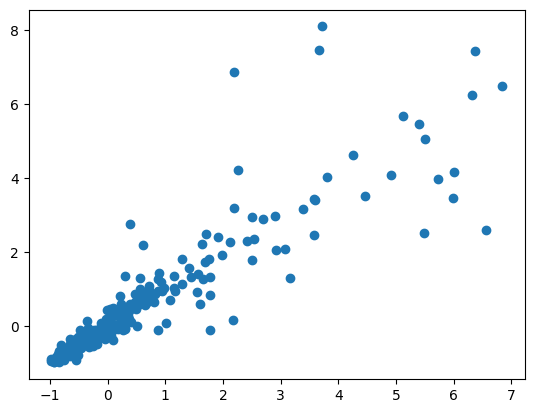

In [422]:
plt.scatter(np.expm1(y_test),np.expm1(lr.predict(x_test)))

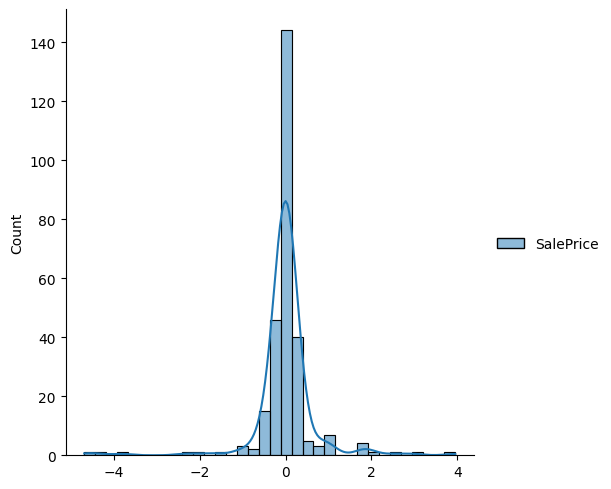

In [423]:
sns.displot(np.expm1(y_test)-np.expm1(lr.predict(x_test)),kde=True)

In [424]:
lsr = Lasso(alpha=0.1)
lsr.fit(x_train,y_train)
lsr.score(x_test,y_test), lsr.score(x_train,y_train)

(0.8343161213940483, 0.8256740458573831)

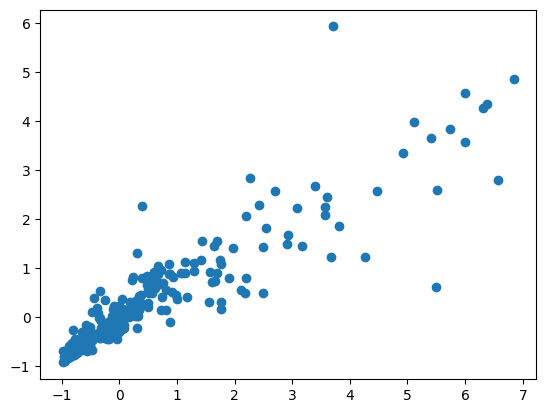

In [425]:
plt.scatter(np.expm1(y_test),np.expm1(lsr.predict(x_test)))

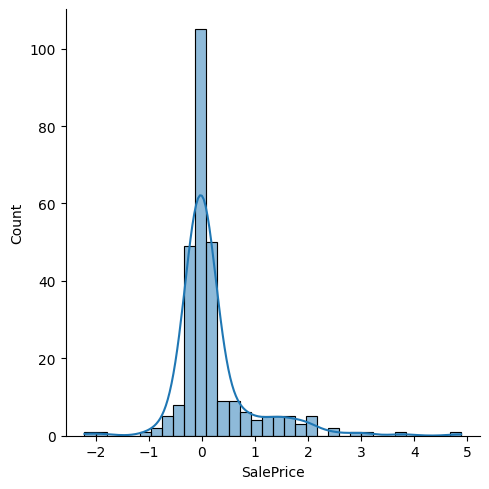

In [426]:
sns.displot(np.expm1(y_test["SalePrice"])-np.expm1(lsr.predict(x_test)),kde=True)

In [427]:
rir = Ridge(alpha=0.1)
rir.fit(x_train,y_train)
rir.score(x_test,y_test), rir.score(x_train,y_train)

(0.8883954954716842, 0.9318039497023525)

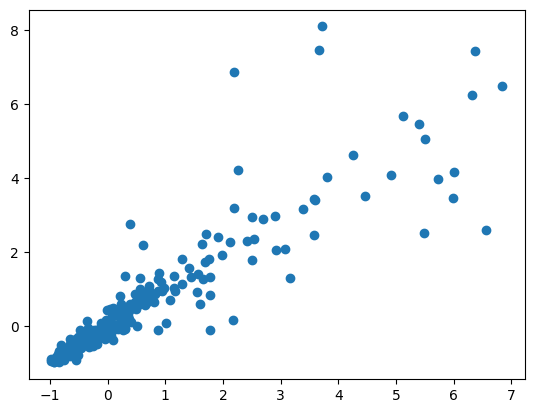

In [428]:
plt.scatter(np.expm1(y_test),np.expm1(rir.predict(x_test)))

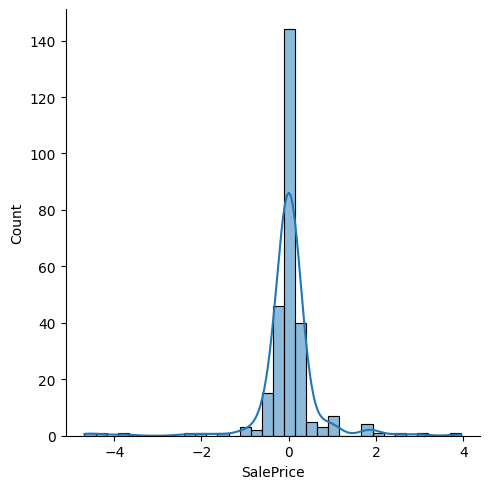

In [429]:
sns.displot(np.expm1(y_test["SalePrice"])-np.expm1(rir.predict(x_test)),kde=True)

In [430]:
for i in range(1,15):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(x_train,y_train)
    print(i, dtr.score(x_test,y_test), dtr.score(x_train,y_train))

1 0.41439213723625956 0.43757234234650766
2 0.6179680164239205 0.610511651139426
3 0.6976688445234648 0.7267912625577005
4 0.7081693170514487 0.7966380034224293
5 0.7325054835168834 0.8551205843981673
6 0.6731212635296115 0.8976765926419553
7 0.676512571434505 0.9284236633574465
8 0.6792278137848069 0.9515043433628126
9 0.6574889831987272 0.9693202053976142
10 0.6484683575941068 0.9809987071234566
11 0.6444575890245765 0.9888816501200254
12 0.6387990102641627 0.9936743243854838
13 0.6310693535890743 0.996307145915962
14 0.6495823385687166 0.9981400340052327


In [431]:
dtr = DecisionTreeRegressor(max_depth=7,min_samples_split=60,min_samples_leaf=30,random_state=42)
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test), dtr.score(x_train,y_train)

(0.7817595306078888, 0.8023894096898718)

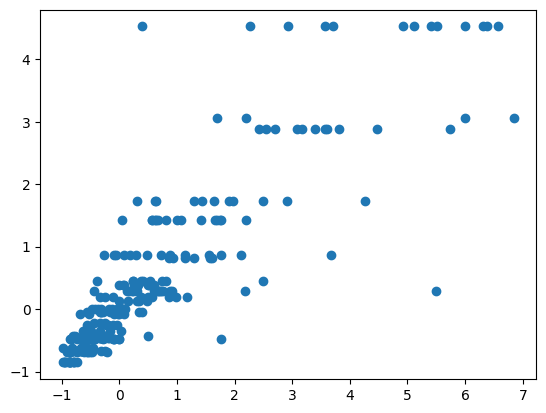

In [432]:
plt.scatter(np.expm1(y_test),np.expm1(dtr.predict(x_test)))

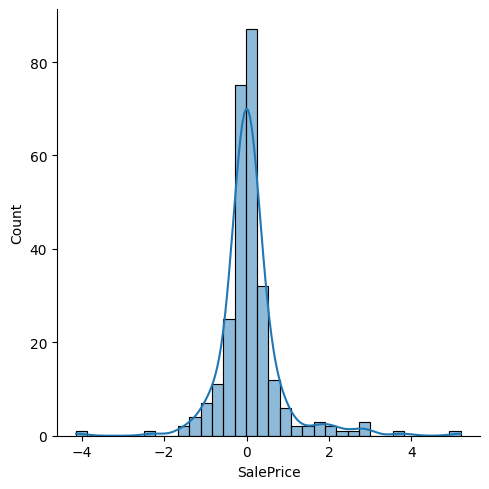

In [433]:
sns.displot(np.expm1(y_test["SalePrice"])-np.expm1(dtr.predict(x_test)),kde=True)

In [434]:
for i in range(2,50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    print(i, knn.score(x_test,y_test), knn.score(x_train,y_train))

2 0.6790700993542844 0.8811328575046883
3 0.7035211027577876 0.8418514480653397
4 0.7015873718018055 0.8153834591349621
5 0.7101629085640637 0.8049786615009944
6 0.7137831504569783 0.7943450035814364
7 0.7091226444303842 0.7827164061109333
8 0.711392084022376 0.7747672804221422
9 0.7166488461882659 0.7676529619705165
10 0.7180373130522415 0.7598810231444573
11 0.7186923502112021 0.7559417849487161
12 0.7167421580678673 0.7518278117869912
13 0.7122590574698473 0.7476433513126914
14 0.7081237544467793 0.7434958698839674
15 0.7004702131009601 0.7394784099314022
16 0.6985744840613448 0.7351715351131871
17 0.6942957738195181 0.7312380133013754
18 0.6912757246785842 0.7270927259489371
19 0.6860071329048043 0.7236902635898188
20 0.6844145825605035 0.7216475336211531
21 0.687099811447633 0.7173430686077091
22 0.6830428259631114 0.7146405459897722
23 0.6771207639484687 0.7111780998042815
24 0.6749901940624425 0.7085505482378736
25 0.6735257676746178 0.705547769713238
26 0.6715950785078362 0.702

In [435]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.7166488461882659, 0.7676529619705165)

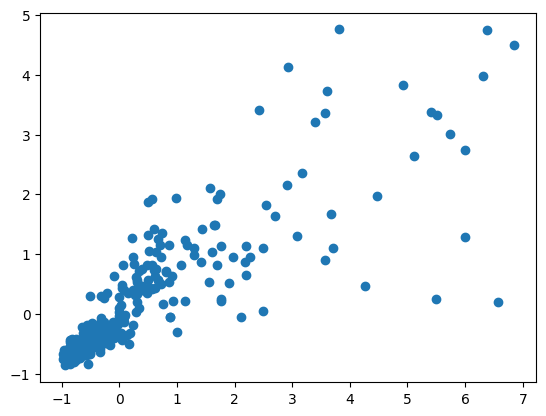

In [436]:
plt.scatter(np.expm1(y_test),np.expm1(knn.predict(x_test)))

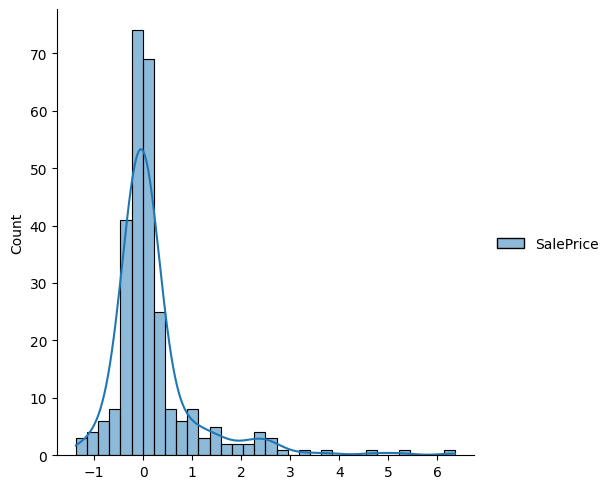

In [437]:
sns.displot(np.expm1(y_test)-np.expm1(knn.predict(x_test)),kde=True)

In [438]:
rdt = RandomForestRegressor(random_state=42)
rdt.fit(x_train,y_train)
rdt.score(x_test,y_test), rdt.score(x_train,y_train)

(0.8761654838152003, 0.9802014988686548)

In [439]:
rdt_params = {
    "n_estimators" : [100,200,300,400,500,600],
    "max_depth" : [None,10,20,30,40,50,60,70,80,90,100,150,200],
    "min_samples_split" : [2,5,10,20,30,40,50,60,70],
    "min_samples_leaf" : [1,5,10,20,30,40,50,60,70],
    "bootstrap" : [True,False],
}

In [440]:
rdt_random_search = RandomizedSearchCV(RandomForestRegressor(),param_distributions=rdt_params,n_iter=100,cv=5,n_jobs=-1,random_state=42)
rdt_random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100, 150,
                                                      200],
                                        'min_samples_leaf': [1, 5, 10, 20, 30,
                                                             40, 50, 60, 70],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40, 50, 60, 70],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=42)

In [441]:
rdt_random_search.best_estimator_

RandomForestRegressor(max_depth=80, n_estimators=300)

In [442]:
rdt_random_search.best_score_

np.float64(0.8555292421203735)

In [443]:
rdt_random_search.score(x_test,y_test),rdt_random_search.score(x_train,y_train)

(0.878220371466198, 0.9817226036817603)

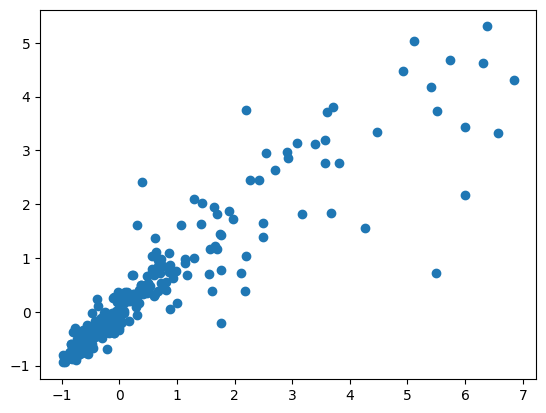

In [444]:
plt.scatter(np.expm1(y_test),np.expm1(rdt_random_search.predict(x_test)))

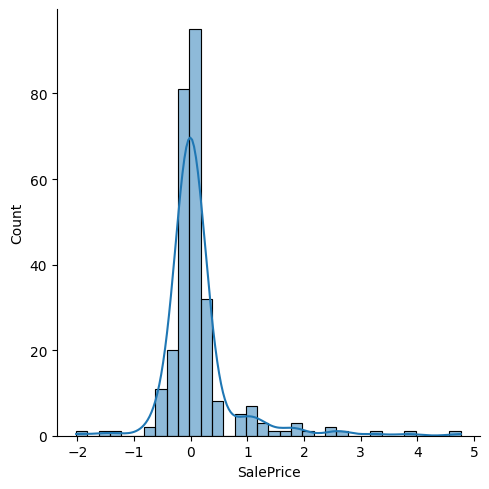

In [445]:
sns.displot(np.expm1(y_test["SalePrice"])-np.expm1(rdt_random_search.predict(x_test)),kde=True)

In [446]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test), xgb.score(x_train,y_train)

(0.8778254985809326, 0.9995762705802917)

In [447]:
scores = cross_val_score(xgb,x_train,y_train,cv=12,scoring="r2")

In [448]:
print(scores)
scores.mean()

[0.83383179 0.80988282 0.84514654 0.86980009 0.89730203 0.85180604
 0.87296546 0.79409814 0.85279512 0.85785085 0.81940162 0.90011245]


np.float64(0.8504160791635513)

In [449]:
xgb_params = {
    "n_estimators": [100,200,300,400,500,600,700,800,900,1000],
    "max_depth" : [None,10,20,30,40,50,60,70,80,90,100,150,200],
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.6,0.4),
    "colsample_bytree": uniform(0.6,0.4)
}

In [450]:
xgb_random_search = RandomizedSearchCV(XGBRegressor(),param_distributions=xgb_params,n_iter=100,cv=5,n_jobs=-1,random_state=42)
xgb_random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001EE090A5350>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001EDF2EAA250>,
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100, 150,
                                                      200],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001EDF2EAA7A0>},
                   random_state=42)

xgb_random_search.best_estimator_

In [451]:
xgb_random_search.best_score_

np.float64(0.8843045234680176)

In [452]:
xgb_random_search.score(x_test,y_test),xgb_random_search.score(x_train,y_train)

(0.9053745865821838, 0.994124710559845)

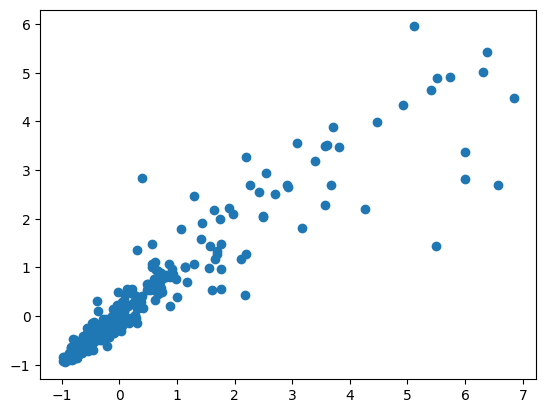

In [453]:
plt.scatter(np.expm1(y_test),np.expm1(xgb_random_search.predict(x_test)))

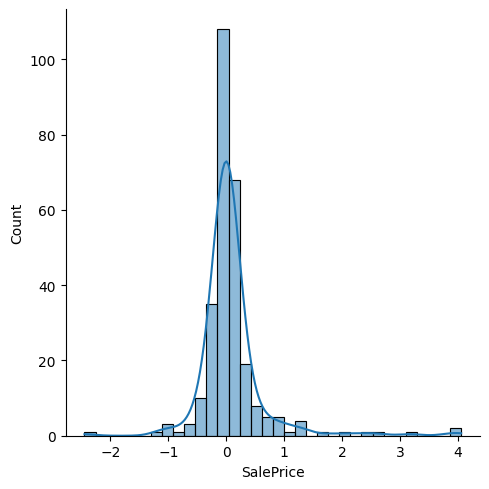

In [454]:
sns.displot(np.expm1(y_test["SalePrice"])-np.expm1(xgb_random_search.predict(x_test)),kde=True)

In [455]:
cbr = CatBoostRegressor()
cbr.fit(x_train,y_train)

Learning rate set to 0.041659
0:	learn: 0.9553155	total: 5.06ms	remaining: 5.05s
1:	learn: 0.9316566	total: 7.64ms	remaining: 3.81s
2:	learn: 0.9088754	total: 10.3ms	remaining: 3.44s
3:	learn: 0.8864023	total: 13.2ms	remaining: 3.27s
4:	learn: 0.8650683	total: 17.4ms	remaining: 3.46s
5:	learn: 0.8450019	total: 21ms	remaining: 3.47s
6:	learn: 0.8262596	total: 24ms	remaining: 3.41s
7:	learn: 0.8076202	total: 27.7ms	remaining: 3.44s
8:	learn: 0.7882415	total: 30.8ms	remaining: 3.39s
9:	learn: 0.7701141	total: 34ms	remaining: 3.36s
10:	learn: 0.7517538	total: 36.8ms	remaining: 3.31s
11:	learn: 0.7344778	total: 40.6ms	remaining: 3.35s
12:	learn: 0.7205404	total: 44.1ms	remaining: 3.35s
13:	learn: 0.7050189	total: 46.5ms	remaining: 3.27s
14:	learn: 0.6902258	total: 48.8ms	remaining: 3.21s
15:	learn: 0.6750456	total: 51.1ms	remaining: 3.14s
16:	learn: 0.6618218	total: 53.4ms	remaining: 3.09s
17:	learn: 0.6478734	total: 55.7ms	remaining: 3.04s
18:	learn: 0.6347824	total: 58.4ms	remaining: 3.02

In [456]:
cbr.score(x_test,y_test), cbr.score(x_train,y_train)

(np.float64(0.9119603469174441), np.float64(0.9910981930673981))

In [457]:
cbr_params = {
    "iterations": [1000,2000,3000,4000,5000],
    "depth": [4,6,8,10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    # "subsample": [0.6,0.8,1.0],
    "bagging_temperature": [0,1,3,5],
    "bootstrap_type": ['Bayesian', 'Bernoulli'],
    "l2_leaf_reg": [1,3,5,7,10],
    "colsample_bylevel": [0.6,0.8,1.0],
    "random_strength": [0,1,5,10]
}

In [458]:
# cbr_random_search = RandomizedSearchCV(CatBoostRegressor(),param_distributions=cbr_params,n_iter=10,cv=5,n_jobs=-1,random_state=42)
# cbr_random_search.fit(x_train,y_train)

In [459]:
cbr_random_search = CatBoostRegressor(random_strength=0,learning_rate=0.05,l2_leaf_reg=1,iterations=2000,depth=4,colsample_bylevel=0.8,bootstrap_type='Bayesian',bagging_temperature=1)
cbr_random_search.fit(x_train,y_train)

0:	learn: 0.9499727	total: 2.17ms	remaining: 4.33s
1:	learn: 0.9202014	total: 4.11ms	remaining: 4.1s
2:	learn: 0.8891426	total: 5.78ms	remaining: 3.84s
3:	learn: 0.8609328	total: 7.33ms	remaining: 3.66s
4:	learn: 0.8345570	total: 8.66ms	remaining: 3.46s
5:	learn: 0.8100805	total: 10.3ms	remaining: 3.41s
6:	learn: 0.7869521	total: 11.5ms	remaining: 3.28s
7:	learn: 0.7634214	total: 13.6ms	remaining: 3.4s
8:	learn: 0.7416900	total: 16ms	remaining: 3.54s
9:	learn: 0.7208793	total: 18.5ms	remaining: 3.67s
10:	learn: 0.7025097	total: 20.4ms	remaining: 3.69s
11:	learn: 0.6849912	total: 23.1ms	remaining: 3.82s
12:	learn: 0.6677352	total: 25ms	remaining: 3.83s
13:	learn: 0.6508130	total: 27.1ms	remaining: 3.84s
14:	learn: 0.6349832	total: 28.9ms	remaining: 3.82s
15:	learn: 0.6203127	total: 30.8ms	remaining: 3.82s
16:	learn: 0.6067029	total: 33.1ms	remaining: 3.86s
17:	learn: 0.5935884	total: 35ms	remaining: 3.85s
18:	learn: 0.5802768	total: 36.8ms	remaining: 3.84s
19:	learn: 0.5685209	total: 38

In [460]:
# cbr_random_search.best_estimator_

In [461]:
# cbr_random_search.best_params_

In [462]:
cbr_random_search.score(x_test,y_test), cbr_random_search.score(x_train,y_train)

(np.float64(0.9170753537330641), np.float64(0.9947542651392011))

In [463]:
cbr_random_search.feature_names_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalSF',
 'TotalBath',
 'TotalBsmtFinSF',
 'ExterQual_encoded',
 'ExterCond_encoded',
 'BsmtQual_encoded',
 'BsmtCond_encoded',
 'HeatingQC_encoded',
 'KitchenQual_encoded',
 'FireplaceQu_encoded',
 'GarageQual_encoded',
 'GarageCond_encoded',
 'BsmtExposure_encoded',
 'BsmtFinType1_encoded',
 'BsmtFinType2_encoded',
 'GarageFinish_encoded',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'La

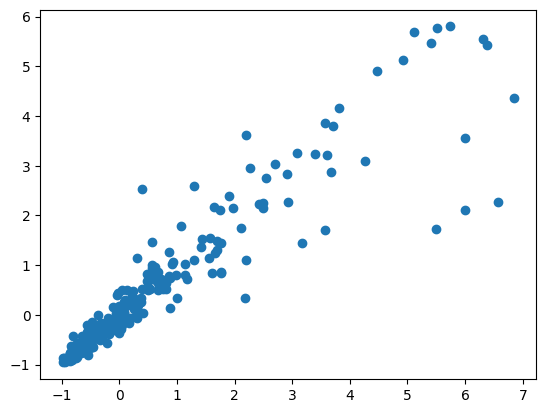

In [464]:
plt.scatter(np.expm1(y_test),np.expm1(cbr_random_search.predict(x_test)))

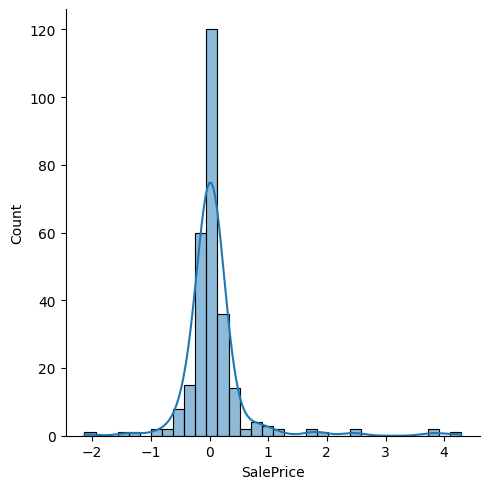

In [465]:
sns.displot(np.expm1(y_test["SalePrice"])-np.expm1(cbr_random_search.predict(x_test)),kde=True)

In [466]:
from sklearn.ensemble import VotingRegressor

In [467]:
models = [("xgb",xgb_random_search.best_estimator_),("rdf",rdt_random_search.best_estimator_),("rir",rir)]
vc = VotingRegressor(models)
vc.fit(x_train,y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=np.float64(0.7367518666865607),
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=...
                                          learning_rate=np.float64(0.028359813162688374),
                                          max_bin=None, max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=400,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('rdf',
                             RandomForestRegressor(max_depth=80,
                                                   n_estimators=300)),
                            ('rir', Ridge(alpha=0.1))])

In [468]:
vc.score(x_test,y_test),vc.score(x_train,y_train),

(0.9112963614370267, 0.9796988714514605)

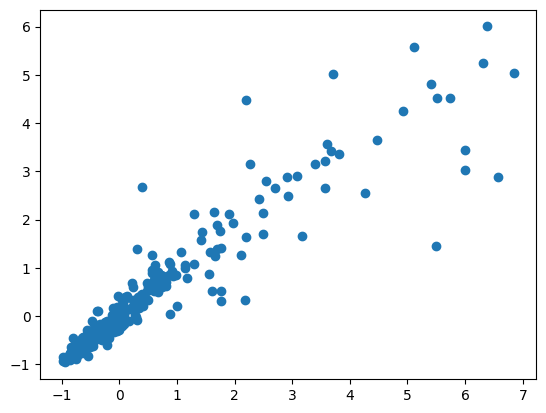

In [469]:
plt.scatter(np.expm1(y_test),np.expm1(vc.predict(x_test)))

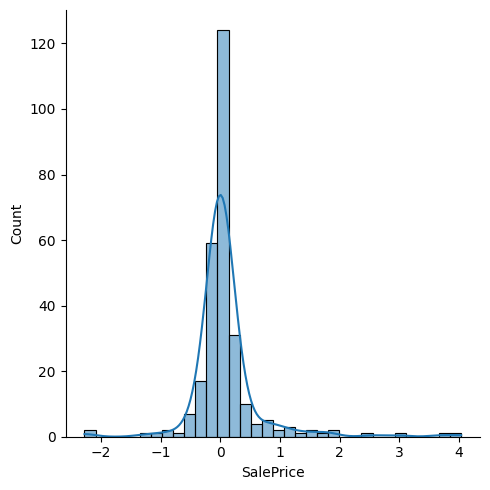

In [470]:
sns.displot(np.expm1(y_test["SalePrice"])-np.expm1(vc.predict(x_test)),kde=True)

In [471]:
models2 =  [("xgb",xgb_random_search.best_estimator_),("rdf",rdt_random_search.best_estimator_),("rir",rir),("cbr",cbr_random_search)]
vc2 = VotingRegressor(models2)
vc2.fit(x_train,y_train)

0:	learn: 0.9499727	total: 1.59ms	remaining: 3.18s
1:	learn: 0.9202014	total: 2.86ms	remaining: 2.86s
2:	learn: 0.8891426	total: 4.73ms	remaining: 3.15s
3:	learn: 0.8609328	total: 6.12ms	remaining: 3.05s
4:	learn: 0.8345570	total: 7.32ms	remaining: 2.92s
5:	learn: 0.8100805	total: 8.72ms	remaining: 2.9s
6:	learn: 0.7869521	total: 9.86ms	remaining: 2.81s
7:	learn: 0.7634214	total: 11.2ms	remaining: 2.79s
8:	learn: 0.7416900	total: 12.9ms	remaining: 2.86s
9:	learn: 0.7208793	total: 14.4ms	remaining: 2.87s
10:	learn: 0.7025097	total: 15.6ms	remaining: 2.82s
11:	learn: 0.6849912	total: 17.1ms	remaining: 2.82s
12:	learn: 0.6677352	total: 18.2ms	remaining: 2.78s
13:	learn: 0.6508130	total: 19.6ms	remaining: 2.78s
14:	learn: 0.6349832	total: 21ms	remaining: 2.78s
15:	learn: 0.6203127	total: 22.1ms	remaining: 2.74s
16:	learn: 0.6067029	total: 23.6ms	remaining: 2.75s
17:	learn: 0.5935884	total: 24.9ms	remaining: 2.75s
18:	learn: 0.5802768	total: 26.3ms	remaining: 2.74s
19:	learn: 0.5685209	tota

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=np.float64(0.7367518666865607),
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=400,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('rdf',
                             RandomForestRegressor(max_depth=80,
                                                   n_estimators=300)),
                            ('rir', Ridge(alpha=0.1)),
                            ('cbr',
                             <catboost.core.CatBoostRegressor object at 0x000001EDA7AD8050>)])

In [472]:
vc2.score(x_test,y_test), vc2.score(x_train,y_train)

(0.9156467886548169, 0.9852458544007571)

In [473]:
from sklearn.svm import SVR

In [474]:
sv = SVR()
sv.fit(x_train,y_train)

SVR()

In [475]:
sv_params = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-2, 3, 20),
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 10)),
    'degree': [2, 3, 4, 5],  # only used for poly kernel
    'epsilon': np.linspace(0.01, 1, 20)
}

In [476]:
sv_random_search = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=sv_params,
    n_iter=50,  # number of random combinations
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

sv_random_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-02, 1.83298071e-02, 3.35981829e-02, 6.15848211e-02,
       1.12883789e-01, 2.06913808e-01, 3.79269019e-01, 6.95192796e-01,
       1.27427499e+00, 2.33572147e+00, 4.28133240e+00, 7.84759970e+00,
       1.43844989e+01, 2.63665090e+01, 4.83293024e+01, 8.85866790e+01,
       1.62377674e+02, 2.9...
                                                  np.float64(0.0001),
                                                  np.float64(0.00035938136638046257),
                                                  np.float64(0.001291549665014884),
                                                  np.float64(0.004641588833612782),
                                                  np.float64(0.016681005372000592),
                                                  np.float64(0.05994842503189409),
                                                  np.float64(0.21544346900318845),
                                                  np.float64(0.7742636826811278),
                                                  np.float64(2.782559402207126),
                                                  np.float64(10.0)],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   random_state=42, verbose=1)

In [477]:
sv_random_search.best_estimator_

SVR(C=np.float64(1000.0), degree=5, epsilon=np.float64(0.01),
    gamma=np.float64(0.0001))

In [478]:
sv_random_search.score(x_test,y_test),sv_random_search.score(x_train,y_train)

(0.8981538359055549, 0.9759306197317834)

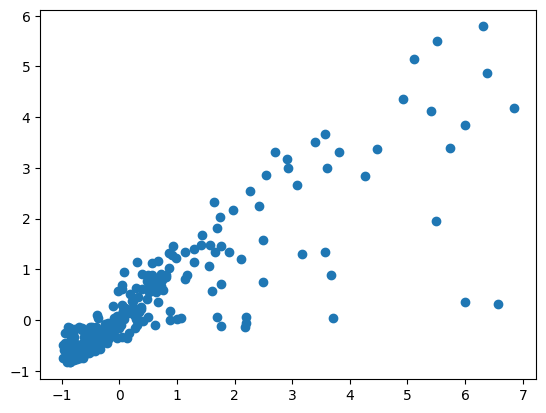

In [479]:
plt.scatter(np.expm1(y_test),np.expm1(sv.predict(x_test)))

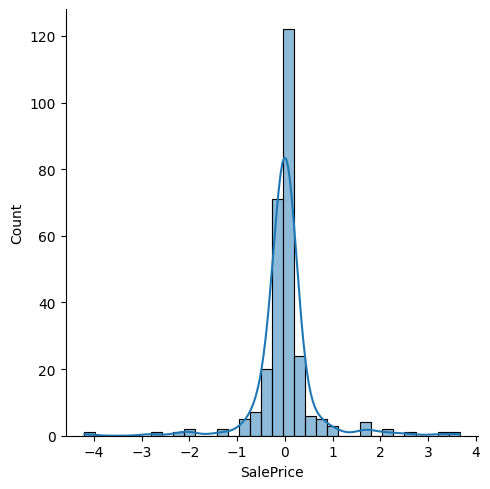

In [480]:
sns.displot(np.expm1(y_test["SalePrice"])-np.expm1(sv_random_search.predict(x_test)),kde=True)

In [481]:
import tensorflow as tf
from tensorflow.keras import layers,regularizers

In [482]:
x_test

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1216    0.060534    -0.345566  0.350871     0.017466     0.363459   0.066474   
420    -0.173710    -0.007884  0.279433     0.017466     2.151907  -1.667436   
1383   -0.173710     0.136836  0.207381    -1.554436     1.257683  -2.000881   
700    -0.876442    -0.104365 -0.406225     0.017466     2.151907  -0.300315   
599     0.294778    -0.827969 -0.132257    -0.768485     0.363459  -3.001213   
...          ...          ...       ...          ...          ...        ...   
346     2.402975    -2.226936 -1.030755     0.017466     2.151907   0.066474   
464    -0.876442     0.136836  0.265808    -0.768485     0.363459   0.033129   
48     -0.876442    -0.056125 -0.286671    -0.768485     1.257683  -0.133593   
155    -0.876442    -0.345566  0.127964     0.017466     0.363459   0.466607   
811     0.060534    -0.104365 -0.239659     0.017466    -0.530765   0.800051   

      YearRemodAdd  MasVnrArea  BsmtUnfSF  LowQualFinSF  ...  SaleType_ConLw  \
1216     -0.581704   -0.563520  -1.001983     -0.120543  ...       -0.059976   
420       0.774148   -0.563520   0.293239     -0.120543  ...       -0.059976   
1383      0.774148   -0.563520   0.003333     -0.120543  ...       -0.059976   
700       0.580455   -0.563520  -1.118881     -0.120543  ...       -0.059976   
599       0.338338   -0.563520   0.181017     -0.120543  ...       -0.059976   
...            ...         ...        ...           ...  ...             ...   
346       1.113111    2.682422  -0.555436     -0.120543  ...       -0.059976   
464      -0.630128   -0.563520  -0.169675     -0.120543  ...       -0.059976   
48       -0.872244   -0.563520  -0.857031     -0.120543  ...       -0.059976   
155      -0.000625   -0.563520   0.031389     -0.120543  ...       -0.059976   
811       0.532031   -0.563520   0.335322     -0.120543  ...       -0.059976   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
1216      -0.25948     -0.046424     0.357391              -0.277885   
420       -0.25948     -0.046424    -2.798055              -0.277885   
1383      -0.25948     -0.046424     0.357391              -0.277885   
700       -0.25948     -0.046424     0.357391              -0.277885   
599       -0.25948     -0.046424     0.357391               3.598611   
...            ...           ...          ...                    ...   
346       -0.25948     -0.046424     0.357391              -0.277885   
464       -0.25948     -0.046424     0.357391              -0.277885   
48        -0.25948     -0.046424     0.357391              -0.277885   
155       -0.25948     -0.046424     0.357391              -0.277885   
811       -0.25948     -0.046424     0.357391              -0.277885   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1216              -0.053625             -0.089151             -0.120605   
420               -0.053625             -0.089151             -0.120605   
1383              -0.053625             -0.089151             -0.120605   
700               -0.053625             -0.089151             -0.120605   
599               -0.053625             -0.089151             -0.120605   
...                     ...                   ...                   ...   
346               -0.053625             -0.089151             -0.120605   
464               -0.053625             -0.089151             -0.120605   
48                -0.053625             -0.089151             -0.120605   
155               -0.053625             -0.089151             -0.120605   
811               -0.053625             -0.089151             -0.120605   

      SaleCondition_Normal  SaleCondition_Partial  
1216              0.439690              -0.264169  
420               0.439690              -0.264169  
1383              0.439690              -0.264169  
700               0.439690              -0.264169  
599              -2.274328              -0.264169  
...   

In [483]:
nn = tf.keras.Sequential()
nn.add(layers.Input(shape=(x_train.shape[1],)))
nn.add(layers.Dense(512,activation="relu",kernel_regularizer=regularizers.l2(1e-4)))
nn.add(layers.BatchNormalization())
nn.add(layers.Dropout(0.3))
nn.add(layers.Dense(256,activation="relu",kernel_regularizer=regularizers.l2(1e-4)))
nn.add(layers.BatchNormalization())
nn.add(layers.Dropout(0.3))
nn.add(layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(1e-4)))
nn.add(layers.BatchNormalization())
nn.add(layers.Dropout(0.3))
nn.add(layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(1e-4)))
nn.add(layers.BatchNormalization())
nn.add(layers.Dropout(0.3))
nn.add(layers.Dense(32,activation="relu",kernel_regularizer=regularizers.l2(1e-4)))
nn.add(layers.BatchNormalization())
nn.add(layers.Dropout(0.3))
nn.add(layers.Dense(1,activation="linear"))


In [484]:
nn.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [485]:
history = nn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,verbose=1,callbacks=[tf.keras.callbacks.EarlyStopping()])

Epoch 1/100


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.1081 - mse: 2.0131 - val_loss: 0.8197 - val_mse: 0.7242
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6023 - mse: 1.5064 - val_loss: 0.6544 - val_mse: 0.5582
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2919 - mse: 1.1954 - val_loss: 0.5230 - val_mse: 0.4264
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0305 - mse: 0.9337 - val_loss: 0.4610 - val_mse: 0.3640
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8765 - mse: 0.7794 - val_loss: 0.4060 - val_mse: 0.3088
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8278 - mse: 0.7306 - val_loss: 0.3603 - val_mse: 0.2630
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7117 - mse: 0.6143 - val_loss: 0.3449 - val_mse: 0.2475
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6727 - mse: 0.5752 - val_loss: 0.3494 - val_mse: 0.2519


In [486]:
nn.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3494 - mse: 0.2519 


[0.3493731617927551, 0.2518696188926697]

In [487]:
y_prd = nn.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


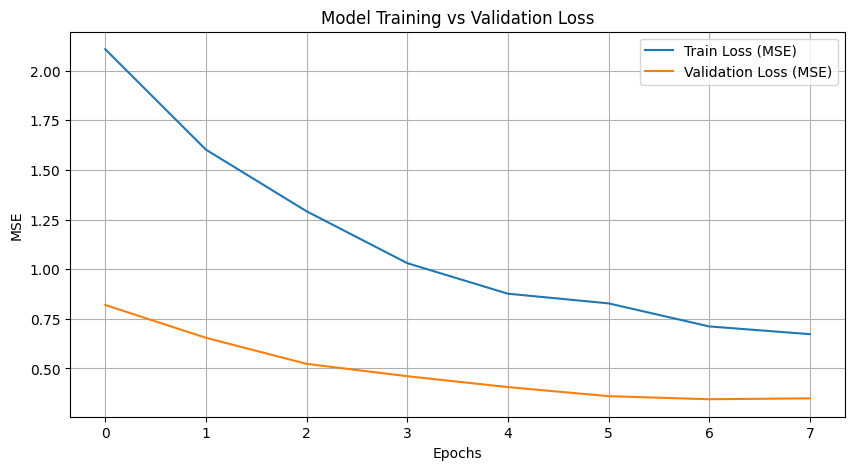

In [488]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


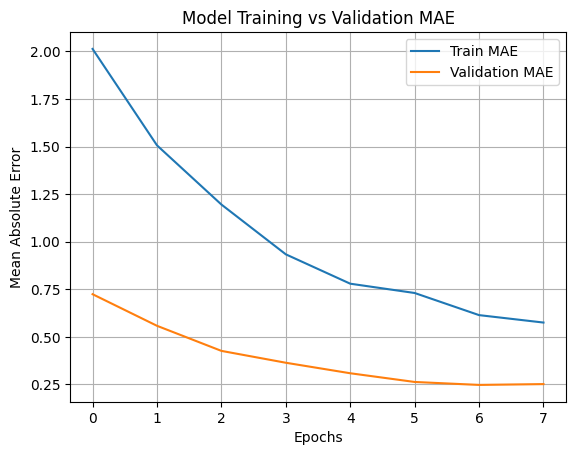

In [489]:
plt.plot(history.history['mse'], label='Train MAE')
plt.plot(history.history['val_mse'], label='Validation MAE')
plt.title('Model Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


In [490]:
from sklearn.metrics import mean_squared_log_error

In [491]:
np.sqrt(mean_squared_log_error(np.expm1(y_test),y_pred=np.expm1(nn.predict(x_test))))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


np.float64(0.5018661661190084)

In [492]:

np.sqrt(mean_squared_log_error(np.expm1(y_test),y_pred=np.expm1(vc.predict(x_test))))

np.float64(0.3161466306778902)

In [493]:
y_prd = (xgb_random_search.predict(x_test)+rdt_random_search.predict(x_test)+rir.predict(x_test)+1.1*nn.predict(x_test).flatten())/4

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [494]:
np.sqrt(mean_squared_log_error(np.expm1(y_test),y_pred=np.expm1(y_prd)))

np.float64(0.33278845955568764)

In [495]:
models3 =  [("xgb",xgb_random_search.best_estimator_),("rdf",rdt_random_search.best_estimator_),("rir",rir),("cbr",cbr_random_search),("sv",sv_random_search.best_estimator_)]
vc3 = VotingRegressor(models3)
vc3.fit(x_train,y_train)

0:	learn: 0.9499727	total: 1.38ms	remaining: 2.75s
1:	learn: 0.9202014	total: 3.47ms	remaining: 3.46s
2:	learn: 0.8891426	total: 5.32ms	remaining: 3.54s
3:	learn: 0.8609328	total: 7.49ms	remaining: 3.74s
4:	learn: 0.8345570	total: 8.93ms	remaining: 3.56s
5:	learn: 0.8100805	total: 10.6ms	remaining: 3.51s
6:	learn: 0.7869521	total: 11.9ms	remaining: 3.39s
7:	learn: 0.7634214	total: 13.3ms	remaining: 3.32s
8:	learn: 0.7416900	total: 14.5ms	remaining: 3.22s
9:	learn: 0.7208793	total: 15.9ms	remaining: 3.17s
10:	learn: 0.7025097	total: 17.1ms	remaining: 3.09s
11:	learn: 0.6849912	total: 19.5ms	remaining: 3.24s
12:	learn: 0.6677352	total: 21.1ms	remaining: 3.22s
13:	learn: 0.6508130	total: 22.6ms	remaining: 3.2s
14:	learn: 0.6349832	total: 24ms	remaining: 3.18s
15:	learn: 0.6203127	total: 25.2ms	remaining: 3.12s
16:	learn: 0.6067029	total: 26.6ms	remaining: 3.11s
17:	learn: 0.5935884	total: 28.1ms	remaining: 3.09s
18:	learn: 0.5802768	total: 29.5ms	remaining: 3.08s
19:	learn: 0.5685209	tota

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=np.float64(0.7367518666865607),
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=...
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=400,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('rdf',
                             RandomForestRegressor(max_depth=80,
                                                   n_estimators=300)),
                            ('rir', Ridge(alpha=0.1)),
                            ('cbr',
                             <catboost.core.CatBoostRegressor object at 0x000001EDA7AD8050>),
                            ('sv',
                             SVR(C=np.float64(1000.0), degree=5,
                                 epsilon=np.float64(0.01),
                                 gamma=np.float64(0.0001)))])

In [496]:
vc3.score(x_test,y_test),vc3.score(x_train,y_train)

(0.9190154727561217, 0.9854075343528066)

In [627]:
vc4 = VotingRegressor( [("xgb",xgb_random_search.best_estimator_),("rdf",rdt_random_search.best_estimator_),("cbr",cbr_random_search),("sv",sv_random_search.best_estimator_)])
vc4.fit(x_train,y_train)

0:	learn: 0.9499727	total: 1.46ms	remaining: 2.93s
1:	learn: 0.9202014	total: 3.26ms	remaining: 3.26s
2:	learn: 0.8891426	total: 4.96ms	remaining: 3.3s
3:	learn: 0.8609328	total: 6.96ms	remaining: 3.47s
4:	learn: 0.8345570	total: 8.56ms	remaining: 3.42s
5:	learn: 0.8100805	total: 10.5ms	remaining: 3.5s
6:	learn: 0.7869521	total: 11.9ms	remaining: 3.4s
7:	learn: 0.7634214	total: 13.5ms	remaining: 3.37s
8:	learn: 0.7416900	total: 14.7ms	remaining: 3.24s
9:	learn: 0.7208793	total: 16.1ms	remaining: 3.21s
10:	learn: 0.7025097	total: 17.5ms	remaining: 3.16s
11:	learn: 0.6849912	total: 19ms	remaining: 3.14s
12:	learn: 0.6677352	total: 20.1ms	remaining: 3.07s
13:	learn: 0.6508130	total: 22ms	remaining: 3.12s
14:	learn: 0.6349832	total: 24.3ms	remaining: 3.21s
15:	learn: 0.6203127	total: 25.6ms	remaining: 3.18s
16:	learn: 0.6067029	total: 27.1ms	remaining: 3.16s
17:	learn: 0.5935884	total: 28.7ms	remaining: 3.16s
18:	learn: 0.5802768	total: 30.4ms	remaining: 3.17s
19:	learn: 0.5685209	total: 3

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=np.float64(0.7367518666865607),
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=400,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('rdf',
                             RandomForestRegressor(max_depth=80,
                                                   n_estimators=300)),
                            ('cbr',
                             <catboost.core.CatBoostRegressor object at 0x000001EDA7AD8050>),
                            ('sv',
                             SVR(C=np.float64(1000.0), degree=5,
                                 epsilon=np.float64(0.01),
                                 gamma=np.float64(0.0001)))])

In [628]:
vc4.score(x_test,y_test), vc4.score(x_train,y_train)

(0.9186921085074068, 0.991155507062001)

In [629]:
cbr_random_search.score(x_test,y_test)

np.float64(0.9170753537330641)

# test.csv 

In [589]:
test_df = pd.read_csv(r"house-prices-advanced-regression-techniques/test.csv")

In [590]:
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [591]:
df = test_df
df = df.drop(columns=['Id','Alley', 'Fence', 'MasVnrType', 'MiscFeature', 'PoolQC'],axis=1)

In [592]:
df.isnull().sum().sum()

np.int64(1599)

<Axes: >

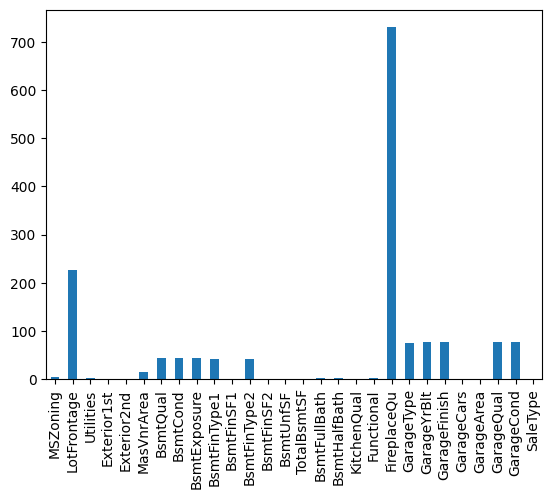

In [593]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing.plot.bar()

In [594]:
for i in missing.index:
    df[i] = df[i].fillna(df[i].mode()[0])

In [595]:
df.isnull().sum().sum()

np.int64(0)

In [596]:
df["TotalSF"] = df["TotalBsmtSF"]+df["1stFlrSF"]+df["2ndFlrSF"]
df = df.drop(columns=["TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1)

In [597]:
df["TotalBath"] = df["BsmtFullBath"]+0.5*df["BsmtHalfBath"]+df["FullBath"]+0.5*df["HalfBath"]
df = df.drop(columns=["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1)

In [598]:
# df["Condition"] = df["Condition1"]+"_"+df["Condition2"]
# df = df.drop(columns=["Condition1","Condition2"],axis=1)

In [599]:
# df["Exterior"] = df["Exterior1st"]+"_"+df["Exterior2nd"]
# df = df.drop(columns=["Exterior1st","Exterior2nd"],axis=1)

In [600]:
df["TotalBsmtFinSF"] = df["BsmtFinSF1"]+df["BsmtFinSF2"]
df = df.drop(columns=["BsmtFinSF1","BsmtFinSF2"],axis=1)

In [601]:
# df["MSSubClass"] = df["MSSubClass"].astype(str)

In [602]:
onehot_col = ["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","Foundation","Heating","CentralAir","Electrical","Functional","GarageType","PavedDrive","SaleType","SaleCondition"]
ordinal_col = ["ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond"]

In [603]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'To

In [604]:
df["BsmtFinType1"].unique()

array(['Rec', 'ALQ', 'GLQ', 'Unf', 'BLQ', 'LwQ'], dtype=object)

In [605]:
for i in ordinal_col:
    col = i+"_encoded"
    print(col)
    df[col] = oe.fit_transform(df[[i]])


df["BsmtExposure_encoded"] = oe2.fit_transform(df[["BsmtExposure"]])

df["BsmtFinType1_encoded"]=oe3.fit_transform(df[["BsmtFinType1"]])
df["BsmtFinType2_encoded"]=oe3.fit_transform(df[["BsmtFinType2"]])

df["GarageFinish_encoded"]=oe4.fit_transform(df[["GarageFinish"]])

ordinal_col+=["BsmtFinType1","BsmtFinType2","GarageFinish","BsmtExposure"]

ExterQual_encoded
ExterCond_encoded
BsmtQual_encoded
BsmtCond_encoded
HeatingQC_encoded
KitchenQual_encoded
FireplaceQu_encoded
GarageQual_encoded
GarageCond_encoded


In [606]:
df = df.drop(columns=ordinal_col,axis=1)

In [607]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(df[onehot_col])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(onehot_col), index=df.index)
df = pd.concat([df.drop(onehot_col, axis=1), encoded_df], axis=1)


In [608]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=203)

In [609]:
x_train.columns
col_df = x_train.columns
col_df

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=216)

In [610]:
df = df.reindex(columns=col_df, fill_value=0)

In [611]:
df = pd.DataFrame(sc.transform(df),columns=df.columns)

In [612]:
df

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0      -0.876442     0.619239  0.189583    -0.768485     0.363459  -0.300315   
1      -0.876442     0.667479  0.514245     0.017466     0.363459  -0.400348   
2       0.060534     0.329797  0.460605    -0.768485    -0.530765   0.900084   
3       0.060534     0.522758 -0.012211     0.017466     0.363459   0.933429   
4       1.465999    -1.165651 -0.622626     1.589367    -0.530765   0.733362   
...          ...          ...       ...          ...          ...        ...   
1454    2.402975    -2.226936 -0.999333    -1.554436     1.257683  -0.000215   
1455    2.402975    -2.226936 -1.004488    -1.554436    -0.530765  -0.000215   
1456   -0.876442     4.478460  1.217947    -0.768485     1.257683  -0.333659   
1457    0.646144    -0.249086  0.044620    -0.768485    -0.530765   0.733362   
1458    0.060534     0.329797 -0.055295     0.803416    -0.530765   0.766707   

      YearRemodAdd  MasVnrArea  BsmtUnfSF  LowQualFinSF  ...  SaleType_ConLw  \
0        -1.114360   -0.563520  -0.674671     -0.120543  ...       -0.059976   
1        -1.259630    0.123856  -0.356710     -0.120543  ...       -0.059976   
2         0.677301   -0.563520  -0.985618     -0.120543  ...       -0.059976   
3         0.677301   -0.436228  -0.548422     -0.120543  ...       -0.059976   
4         0.386761   -0.563520   1.071775     -0.120543  ...       -0.059976   
...            ...         ...        ...           ...  ...             ...   
1454     -0.678551   -0.563520  -0.029398     -0.120543  ...       -0.059976   
1455     -0.678551   -0.563520  -0.618560     -0.120543  ...       -0.059976   
1456      0.580455   -0.563520  -1.305916     -0.120543  ...       -0.059976   
1457      0.386761   -0.563520   0.038403     -0.120543  ...       -0.059976   
1458      0.483608    0.034752  -0.749485     -0.120543  ...       -0.059976   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         -0.25948     -0.046424     0.357391              -0.277885   
1         -0.25948     -0.046424     0.357391              -0.277885   
2         -0.25948     -0.046424     0.357391              -0.277885   
3         -0.25948     -0.046424     0.357391              -0.277885   
4         -0.25948     -0.046424     0.357391              -0.277885   
...            ...           ...          ...                    ...   
1454      -0.25948     -0.046424     0.357391              -0.277885   
1455      -0.25948     -0.046424     0.357391               3.598611   
1456      -0.25948     -0.046424     0.357391               3.598611   
1457      -0.25948     -0.046424     0.357391              -0.277885   
1458      -0.25948     -0.046424     0.357391              -0.277885   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                 -0.053625             -0.089151             -0.120605   
1                 -0.053625             -0.089151             -0.120605   
2                 -0.053625             -0.089151             -0.120605   
3                 -0.053625             -0.089151             -0.120605   
4                 -0.053625             -0.089151             -0.120605   
...                     ...                   ...                   ...   
1454              -0.053625             -0.089151             -0.120605   
1455              -0.053625             -0.089151             -0.120605   
1456              -0.053625             -0.089151             -0.120605   
1457              -0.053625             -0.089151             -0.120605   
1458              -0.053625             -0.089151             -0.120605   

      SaleCondition_Normal  SaleCondition_Partial  
0                 0.439690              -0.264169  
1                 0.439690              -0.264169  
2                 0.439690              -0.264169  
3                 0.439690              -0.264169  
4                 0.439690              -0.264169  
...   

In [613]:
model_feature_names = cbr_random_search.feature_names_
print(model_feature_names)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'TotalBath', 'TotalBsmtFinSF', 'ExterQual_encoded', 'ExterCond_encoded', 'BsmtQual_encoded', 'BsmtCond_encoded', 'HeatingQC_encoded', 'KitchenQual_encoded', 'FireplaceQu_encoded', 'GarageQual_encoded', 'GarageCond_encoded', 'BsmtExposure_encoded', 'BsmtFinType1_encoded', 'BsmtFinType2_encoded', 'GarageFinish_encoded', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', '

In [614]:
# df.columns = model_feature_names
# df.columns

In [615]:
# preds = xgb_search.predict(df)
preds = vc2.predict(df)
# preds_vc3 = vc3.predict(df)
# preds = (xgb_random_search.predict(df)+rdt_random_search.predict(df)+rir.predict(df)+1.1*nn.predict(df).flatten())/4

In [616]:
# np.expm1(preds)
preds_1 = sc2.inverse_transform(preds.reshape(-1,1))

In [617]:
preds_1

array([[11.73897734],
       [12.00487763],
       [12.12376586],
       ...,
       [11.9656086 ],
       [11.68704831],
       [12.30404774]], shape=(1459, 1))

In [618]:
preds_2 = np.expm1(preds_1)


In [619]:
preds_2

array([[125363.06906257],
       [163549.58871756],
       [184196.87304961],
       ...,
       [157251.58238607],
       [119019.1761978 ],
       [220586.06312422]], shape=(1459, 1))

In [620]:
df["preds"] = preds_2
df["Id"] = test_df["Id"]

In [621]:
submission = pd.DataFrame({},columns=["Id","SalePrice"])

In [622]:
submission["Id"] = df["Id"]
submission["SalePrice"] = df["preds"]

In [623]:
submission

Id      SalePrice
0     1461  125363.069063
1     1462  163549.588718
2     1463  184196.873050
3     1464  193188.123736
4     1465  184697.108008
...    ...            ...
1454  2915   83950.454632
1455  2916   83504.714525
1456  2917  157251.582386
1457  2918  119019.176198
1458  2919  220586.063124

[1459 rows x 2 columns]

In [624]:
submission.to_csv("submission_vc2_with_cbr_3.csv",index=False,float_format="%.8f")

In [849]:
from catboost import CatBoostRegressor

In [904]:
cb = CatBoostRegressor()
cb.fit(x_train,y_train)

Learning rate set to 0.04192
0:	learn: 0.9450574	total: 4.79ms	remaining: 4.78s
1:	learn: 0.9215169	total: 10.5ms	remaining: 5.25s
2:	learn: 0.8969458	total: 18.3ms	remaining: 6.09s
3:	learn: 0.8727782	total: 34.2ms	remaining: 8.51s
4:	learn: 0.8487844	total: 45.5ms	remaining: 9.06s
5:	learn: 0.8271793	total: 57ms	remaining: 9.44s
6:	learn: 0.8062750	total: 67.8ms	remaining: 9.62s
7:	learn: 0.7863933	total: 74.6ms	remaining: 9.25s
8:	learn: 0.7666107	total: 82.7ms	remaining: 9.11s
9:	learn: 0.7473824	total: 88.7ms	remaining: 8.78s
10:	learn: 0.7298896	total: 96ms	remaining: 8.63s
11:	learn: 0.7141862	total: 104ms	remaining: 8.56s
12:	learn: 0.6982852	total: 113ms	remaining: 8.59s
13:	learn: 0.6829649	total: 121ms	remaining: 8.55s
14:	learn: 0.6684622	total: 129ms	remaining: 8.44s
15:	learn: 0.6538200	total: 135ms	remaining: 8.3s
16:	learn: 0.6396800	total: 143ms	remaining: 8.26s
17:	learn: 0.6264833	total: 148ms	remaining: 8.1s
18:	learn: 0.6128356	total: 154ms	remaining: 7.95s
19:	lea

In [851]:
cb.score(x_test,y_test)

np.float64(0.9132008386684831)